In [147]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
from myutils.mystats import*

In [293]:
def hist_min_bincount(data, min_count):
    """
    Esta función devuelve una dupla histogra,abins (similar a numpy.histogram),
    donde el bineado del histograma es tal que el número mínimo de elementos por
    bin es almenos 'count'. No se puede modificar el rango del histograma, y 
    este se devuelve de forma natural (i.e., density=False).
    """
    b = len(data)
    hist,bins = np.histogram(data,bins=b,density=False)
    while min(hist)<min_count:
        b-=1
        hist,bins = np.histogram(data,bins=b,density=False)
    return hist,bins    

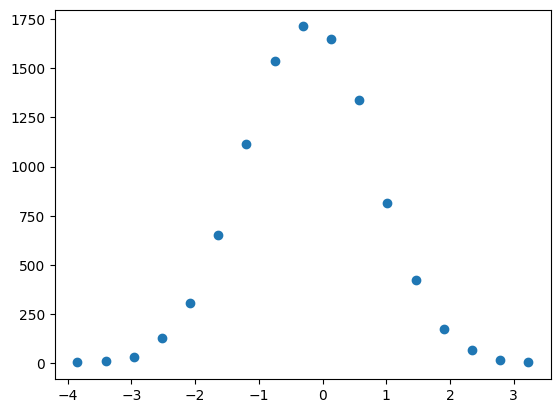

In [294]:
obs,bins = hist_min_bincount(data=st.norm.rvs(size=N), count=5)

plt.scatter(bins[:-1],obs)

# Distribución $\chi^2$ para un experimento normal

## Simulación

In [305]:
T = 10000 # Estadística para generar la distribución chi^2
N = 100000 # Estadística para generar los datos. El bineado óptimo depende
         # de esta cantidad
b = 14 # bineado

chisq=[]
for t in range(T):
    obs,bins = np.histogram(st.norm.rvs(size=N), bins=b) # Datos observados experimentalmente.
    b = len(obs)
    exp = np.array(bin_rv_cont(st.norm, bins))*obs.sum() # Datos esperados teóricamente.
    chisq.append(np.sum((obs-exp)**2/exp))
    
    if (t+1)%1000==0:
        print(f'{(t+1)/1000:.0f}/{T/1000:.0f}',end='\r')

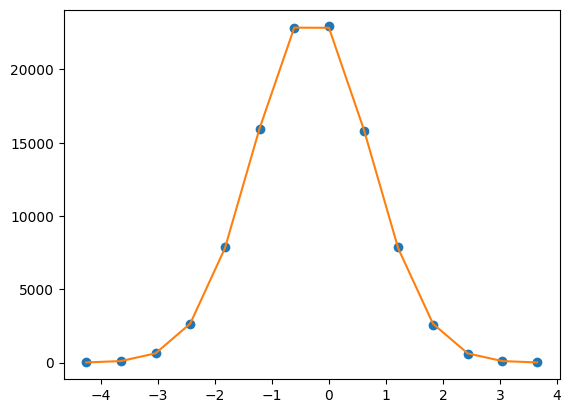

In [306]:
plt.scatter(bins[:-1],obs)
plt.plot(bins[:-1],exp,color='C1')
plt.show()

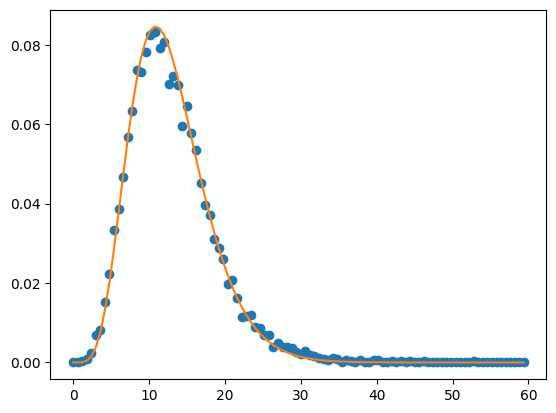

In [307]:
chisq_hist,chisq_bins = np.histogram(chisq,density=True,bins=100,range=(0,60))
dx = chisq_bins[1]-chisq_bins[0]

teo = st.chi2.pdf(x=np.linspace(chisq_bins[0],chisq_bins[-1],100), df=b-1)
teo = teo/(teo.sum()*dx)

plt.scatter(chisq_bins[:-1],chisq_hist)
plt.plot(chisq_bins[:-1],
         teo,
         color='C1')

plt.show()

## Ejemplo 

# Distribución $\chi^2$ para un experimento binomial

## Simulación

In [321]:
T = 10000 # Estadística para generar la distribución chi^2
N = 1000 # Estadística para generar los datos. El bineado óptimo depende
          # de esta cantidad
b = 10 # bineado

chisq=[]
for t in range(T):
    obs,bins = np.histogram(st.binom.rvs(size=N,n=100,p=0.5), bins=b) # Datos observados experimentalmente.
    exp = np.array(bin_rv_discrete(st.binom,bins,n=100,p=0.5))*obs.sum() # Datos esperados teóricamente.
    chisq.append(np.sum((obs-exp)**2/exp))
    
    if (t+1)%1000==0:
        print(f'{(t+1)/1000:.0f}/{T/1000:.0f}',end='\r')

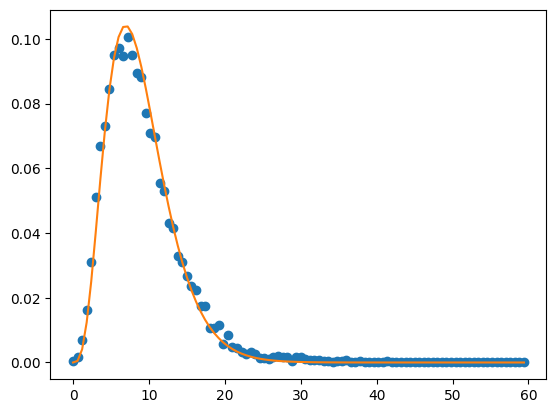

In [333]:
chisq_hist,chisq_bins = np.histogram(chisq,density=True,bins=100,range=(0,60))

teo = st.chi2.pdf(x=np.linspace(chisq_bins[0],chisq_bins[-1],100), df=b-1)

plt.scatter(chisq_bins[:-1],chisq_hist)
plt.plot(chisq_bins[:-1],
         teo,
         color='C1')

plt.show()

In [ ]:
chisq_hist,chisq_bins = np.histogram(chisq,density=True,bins=100,range=(0,0.06))
dx = chisq_bins[1]-chisq_bins[0]

teo = st.chi2.pdf(x=np.linspace(chisq_bins[0],chisq_bins[-1],100), df=b-1)
teo = teo/(teo.sum()*dx)

plt.scatter(chisq_bins[:-1],chisq_hist)
plt.plot(chisq_bins[:-1],
         teo,
         color='C1')

plt.show()

## Ejemplo

In [ ]:
n_obs = 10
p_obs = 0.5
n_modelo = 11
p_modelo = 0.5

chisq_gof_discrete(st.binom.rvs(n=n_obs, p=p_obs, size=1000), st.binom.pmf, plothist=True, alpha=0.05, n=n_modelo,p=p_modelo)

In [ ]:
def find_binning(data, n=10):
    """
    Esta función busca un binneado tal que el número mínimo de eventos
    en un bin sea 'n'
    """
    b = max(data)
    while 1:
        aux = np.histogram(data, bins=b)
        if min(aux[0])<=n:
            b-=1
        else:
            return aux
        
        
data = st.binom.rvs(n=100, p=0.48, size=1000000)
data_hist = find_binning(data, 5)
plt.bar(data_hist[1][:-1],data_hist[0])
plt.show()

print(data_hist[0])

In [ ]:
## Histograma esperado de 10 bins para una distribución teórica n=100, p=0.5:
n_bin=10

hist_exp = [st.binom.pmf(k=range(100//n_bin*i,100//n_bin*(i+1),1), n=100, p=0.5).sum() for i in range(n_bin)]
#print(hist_exp)
plt.bar(range(n_bin),hist_exp)

In [ ]:
help('scipy.stats.chisquare')

In [ ]:
N = 1000
n = 100
p = 0.5

data_obs,data_obs_count = np.unique(st.binom.rvs(n=n, p=p, size=N), return_counts=True)
data_obs_count = data_obs_count/data_obs_count.sum()
data_exp = st.binom.pmf(k=data_obs,n=n,p=p)
data_exp = data_exp/data_exp.sum()

plt.bar(data_obs, data_obs_count,color='C0')
plt.plot(data_obs, data_exp, color='C1')
plt.show()

chi2 = np.sum((data_obs_count-data_exp)**2/data_exp)
print(chi2)

In [ ]:
N = 10000
n = 100
p = 0.5
b = 15

chisq=[]
for t in range(10000):
    data_obs_count,data_obs = np.histogram(st.binom.rvs(n=n, p=p, size=N), bins=b)
    #data_obs_count = data_obs_count/data_obs_count.sum()

#print(data_obs)

    data_exp = N*np.array([st.binom.pmf(k=range(int(np.ceil(data_obs[i])),int(np.fix(data_obs[i+1])),1),n=n,p=p).sum() for i in range(len(data_obs)-1)])
    #data_exp = data_exp/data_exp.sum()

#plt.bar(range(b),data_obs_count)
#plt.plot(range(b),data_exp,'--o',color='C1')
#plt.show()

    chisq.append(np.sum( [((data_obs_count[i]-data_exp[i])**2)/data_exp[i] for i in range(b)]))
    
    if (t+1)%100==0:
        print(f'{t+1}/10000', end='\r')
#print(chi2)

In [ ]:
hist,bins = np.histogram(chisq,bins=10)
hist = hist/hist.sum()
plt.plot(bins[:-1],hist,'o')
plt.show()
plt.plot(np.linspace(0,100,100), st.chi2.pdf(x=np.linspace(0,100,100),df=14))
plt.show()
print(hist)

In [ ]:
a=np.array(2.0)
print(np.ceil(a))

In [ ]:
help('numpy.fix')

# Ejemplo de test $\chi^2$ para el artículo NIST 

In [ ]:
data_obs_count,data_obs = np.histogram(st.norm.rvs(size=1000), bins=32)
data_obs_count = data_obs_count#/data_obs_count.sum()

plt.bar(data_obs[:-1],data_obs_count, width=0.15)
plt.show()

#print(data_obs)

data_exp = np.array([1000*(st.norm.cdf(x=data_obs[i+1])-st.norm.cdf(x=data_obs[i])) for i in range(len(data_obs)-1)])
data_exp = data_exp#/data_exp.sum()

plt.bar(range(len(data_obs_count)),data_obs_count)
plt.plot(range(len(data_obs_count)),data_exp,'--o',color='C1')
plt.show()

chisq = np.sum( [((data_obs_count[i]-data_exp[i])**2)/data_exp[i] for i in range(len(data_obs_count))])
print(chisq)

# Simulación para distribución normal

In [27]:
N = 1000
T = 1000
b = 32

chisq=[]
for t in range(T):
    data_obs_hist,data_obs_bins = np.histogram(st.norm.rvs(size=N), bins=b)

    data_exp = np.array(bin_rv_cont(st.norm, data_obs_bins))*data_obs_hist.sum()

    chisq.append(np.sum( (data_obs_hist-data_exp)**2/data_exp))
    #chisq.append( st.chisquare(f_obs=data_obs_hist, f_exp=data_exp)[0] )
    if (t+1)%1000==0:
        print(f'{(t+1)/1000:.0f}/{T/1000:.0f}',end='\r')

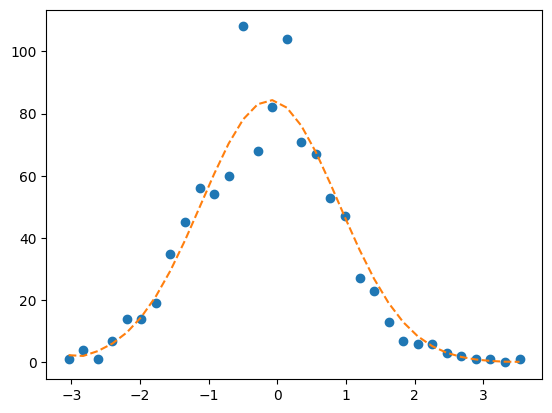

In [28]:
plt.scatter(data_obs_bins[:-1],data_obs_hist,color='C0')
plt.plot(data_obs_bins[:-1],data_exp,'--',color='C1')
plt.show()

1000


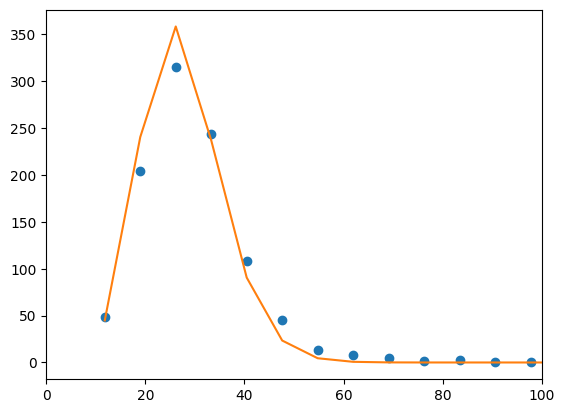

In [29]:
df = b-1

hist = np.histogram(chisq, bins=100)
print(hist[0].sum()) # DEBUG
hist_exp=[T*(st.chi2.cdf(x=hist[1][1],df=df))]
for i in range(1,len(hist[0])-1,1):
    hist_exp.append( T*(st.chi2.cdf(x=hist[1][i+1],df=df)-st.chi2.cdf(x=hist[1][i],df=df)) )
hist_exp+=[T*(1-st.chi2.cdf(x=hist[1][-2],df=df))]

plt.scatter(hist[1][:-1], hist[0])
plt.plot(hist[1][:-1],hist_exp,color='C1')
plt.xlim(0,100)
plt.show()

# Simulación para distribución binomial

In [ ]:
N = 1000
T = 10000
b = 10

n=100
p = 0.5

chisq=[]
for t in range(T):
    data_obs_hist,data_obs_bins = np.histogram(st.binom.rvs(n=n,p=p,size=N), bins=b)

    data_exp = np.array(bin_rv_discrete(st.binom, data_obs_bins,n=n,p=p))*data_obs_hist.sum()
    
    chisq.append(np.sum( (data_obs_hist-data_exp)**2/data_exp))
    #chisq.append( st.chisquare(f_obs=data_obs_hist, f_exp=data_exp)[0] )
    if (t+1)%1000==0:
        print(f'{(t+1)/1000:.0f}/{T/1000:.0f}',end='\r')

In [ ]:
plt.scatter(data_obs_bins[:-1],data_obs_hist,color='C0')
plt.plot(data_obs_bins[:-1],data_exp,'--',color='C1')
plt.show()

In [ ]:
df = b-1

hist = np.histogram(chisq,bins=100)

hist_exp=[T*(st.chi2.cdf(x=hist[1][1],df=df))]
for i in range(1,len(hist[0])-1,1):
    hist_exp.append( T*(st.chi2.cdf(x=hist[1][i+1],df=df)-st.chi2.cdf(x=hist[1][i],df=df)) )
hist_exp+=[T*(1-st.chi2.cdf(x=hist[1][-2],df=df))]

plt.scatter(hist[1][:-1], hist[0])
plt.plot(hist[1][:-1],hist_exp,color='C1')
plt.xlim(0,50)
plt.show()

## Convertir una distribución teórica en un histograma de 'b' bins

In [ ]:
hist,bins = np.histogram(st.binom.rvs(n=n,p=p,size=10000))

#extremos = [(0,int(np.fix(bins[1])))]
#for i in range(1,len(bins)-1,1):
 #   extremos += [(int(np.ceil(bins[i])),int(np.fix(bins[i+1]))) ]
#extremos += [(int(np.ceil(bins[-2])),n)]

data_exp = [st.binom.cdf(k=int(np.fix(bins[1])),n=n,p=p)]
for i in range(1,len(bins)-1,1):
    data_exp += [st.binom.cdf(k=int(np.fix(bins[i+1])),n=n,p=p)-st.binom.cdf(k=int(np.ceil(bins[i]))-1,n=n,p=p)]
data_exp += [1-st.binom.cdf(k=int(np.ceil(bins[-2]))-1,n=n,p=p)]

plt.bar(bins[:-1], hist)
plt.plot(bins,hist.sum()*np.array(data_exp),color='C1')
plt.show()

In [ ]:
hist,bins = np.histogram(st.binom.rvs(n=n,p=p,size=10000))

extremos = [(0,int(np.fix(bins[1])))]
for i in range(1,len(bins)-1,1):
    extremos += [(int(np.ceil(bins[i])),int(np.fix(bins[i+1]))) ]
extremos += [(int(np.ceil(bins[-2])),n)]
data_exp = np.array([np.sum(st.binom.pmf(k=range(extremo[0],extremo[1]+1,1),n=n,p=p)) for extremo in extremos])

plt.bar(bins[:-1], hist)
plt.plot(bins,hist.sum()*data_exp,color='C1')
plt.show()

In [ ]:
def bin_rv_discrete(rv_discrete,bins_in, **kwargs):
    """
    Esta función toma un objeto 'rv_discrete' de scip y lista 'bins' conteniendo un bineado del eje de abscisas
    (i.e., una lista de 'bins' tal y como es devuelta por la función 'numpy.histogram',
    es decir una lista de N_bins+1 elementos, conteniendo los ectremos de cada bin),
    y devuelve una lista de tamaño 'N_bin' elementos conteniendo la probabilidad
    acumulada en los extremos dados por 'bins'. El argumento '**kwargs' se utiliza
    para pasar parámetros extra a 'rv_discrete'.
    """
    bins = [i-1e-6 if i.is_integer() else i for i in bins_in] #Así nos aseguramos de que el binneado sea cerrado por la izda. y abierto por la dcha.
    
    data_exp = [rv_discrete.cdf(k=int(bins[1]),**kwargs)]
    for i in range(1,len(bins)-2,1):
        data_exp += [rv_discrete.cdf(k=int(bins[i+1]),**kwargs)-rv_discrete.cdf(k=int(bins[i]),**kwargs)]
    data_exp += [1-rv_discrete.cdf(k=int(bins[-2]),**kwargs)]

    return data_exp

1.0


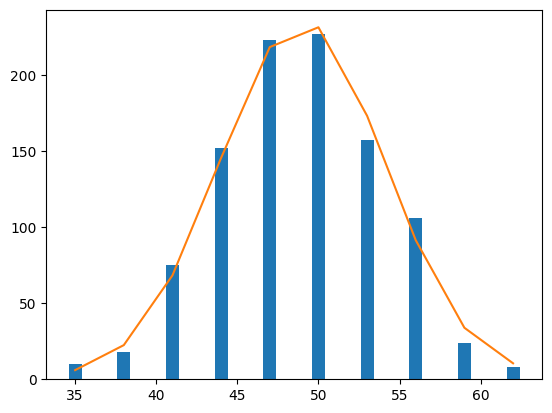

In [116]:
n=100

hist,bins = np.histogram(st.binom.rvs(n=100,p=0.5,size=1000))
#print(bins)

data_exp = bin_rv_discrete(st.binom, bins, n=100,p=0.5)
print(np.sum(data_exp))

plt.bar(bins[:-1], hist)
plt.plot(bins[:-1],hist.sum()*np.array(data_exp),color='C1')
plt.show()

In [ ]:
def bin_rv_cont(rv_continuous,bins_in, **kwargs):
    """
    Esta función toma un objeto 'rv_continuous' de scipy y una lista 'bins' conteniendo un bineado del eje de abscisas
    (i.e., una lista de 'bins' tal y como es devuelta por la función 'numpy.histogram',
    es decir una lista de N_bins+1 elementos, conteniendo los ectremos de cada bin),
    y devuelve una lista de tamaño 'N_bin' elementos conteniendo la probabilidad
    acumulada en los extremos dados por 'bins'. El argumento '**kwargs' se utiliza
    para pasar parámetros extra a 'rv_continuous'.
    """
    bins = bins_in[:]
    
    data_exp = [rv_continuous.cdf(x=bins[1],**kwargs)]
    for i in range(1,len(bins)-2,1):
        data_exp += [rv_continuous.cdf(x=bins[i+1],**kwargs)-rv_continuous.cdf(x=bins[i],**kwargs)]
    data_exp += [1-rv_continuous.cdf(x=bins[-2],**kwargs)]
    
    return data_exp

In [ ]:
hist,bins = np.histogram(st.norm.rvs(size=1000))

data_exp = bin_rv_cont(st.norm, bins)
print(np.sum(data_exp))

plt.plot(bins[:-1], hist,'o')
plt.plot(bins[:-1],hist.sum()*np.array(data_exp),color='C1')
plt.show()